In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [3]:
new_ratings = ratings.iloc[np.isin(ratings["movieId"],ratings["movieId"].unique()[:5] )]

In [4]:
user_movie = pd.crosstab(new_ratings.userId,new_ratings.movieId, values=new_ratings.rating, aggfunc="mean")

In [5]:
user_movie.shape

(107143, 5)

In [6]:
user_movie_train, user_movie_test = train_test_split(user_movie, test_size=0.3)

In [7]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(1, 15):
    kmeans = make_pipeline(KNNImputer(n_neighbors=3),KMeans(n_clusters = i, init = 'k-means++', random_state = 42))
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(user_movie_train) 
    elbow.append(kmeans.named_steps['kmeans'].inertia_)
    print("Kmeans med {} klynger".format(i))

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 1 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 2 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 3 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 4 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 5 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 6 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 7 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 8 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 9 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 10 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 11 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 12 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 13 klynger


C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans med 14 klynger


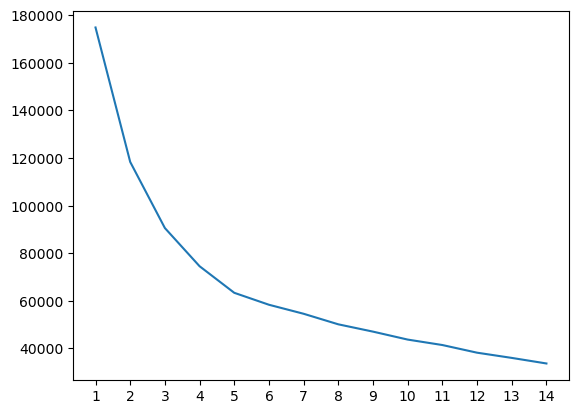

In [8]:
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,14),np.arange(1,15))
plt.show()

In [9]:
kmeans =  make_pipeline(KNNImputer(n_neighbors=3),KMeans(n_clusters = 12, init = 'k-means++', random_state = 42))
kmeans.fit(user_movie_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=3)),
                ('kmeans', KMeans(n_clusters=12, random_state=42))])

In [ ]:
y_user_movie_hat = kmeans.predict(user_movie_test)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42) # use fit_transform instead of fit, as TSNE has no transform method 
movie_tsne = tsne.fit_transform(kmeans["knnimputer"].transform(user_movie_train))

In [ ]:
for i in sorted(np.unique(y_user_movie_hat)):
    temp_scatter = movie_tsne[np.where(y_user_movie_hat==i)]
    plt.scatter(x=temp_scatter[:,0],y=temp_scatter[:,1], color="C{}".format(i))
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=2)

movie_pca = pca.fit_transform(kmeans["knnimputer"].transform(user_movie_train))

In [ ]:
for i in sorted(np.unique(y_user_movie_hat)):
    temp_scatter = movie_pca[np.where(y_user_movie_hat==i)]
    plt.scatter(x=temp_scatter[:,0],y=temp_scatter[:,1], color="C{}".format(i))
plt.show()